In [27]:
# Import the packages
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
from sklearn.metrics import r2_score
from sqlalchemy import create_engine


In [28]:
plt.style.use('dark_background')
#resize plot to wide form
plt.rcParams['figure.figsize'] = [20, 4]
#shrink plot labels
plt.rcParams.update({'font.size': 12})
#remove all boundaries
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [32]:
data_raw = pd.read_csv('raw_island_days2.csv', delimiter = ',')

#get data_raw length
data_raw_length = len(data_raw)

#get split index for train and test
#split_index = int(data_raw_length*.8)
split_index = 25968

#set datatype to datetime for first column in data_raw
data_raw['time'] = pd.to_datetime(data_raw['time'])
#data_raw.set_index('time', inplace=True)

year_1 = data_raw.iloc[:365]
#year_2 = year_1
year_2 = data_raw.iloc[365:730]

First, we will upload the this dataset into your PostgreSQL database. To do so, we will first set up connection to the database.

**Here, you need to fill in your database connection information below**

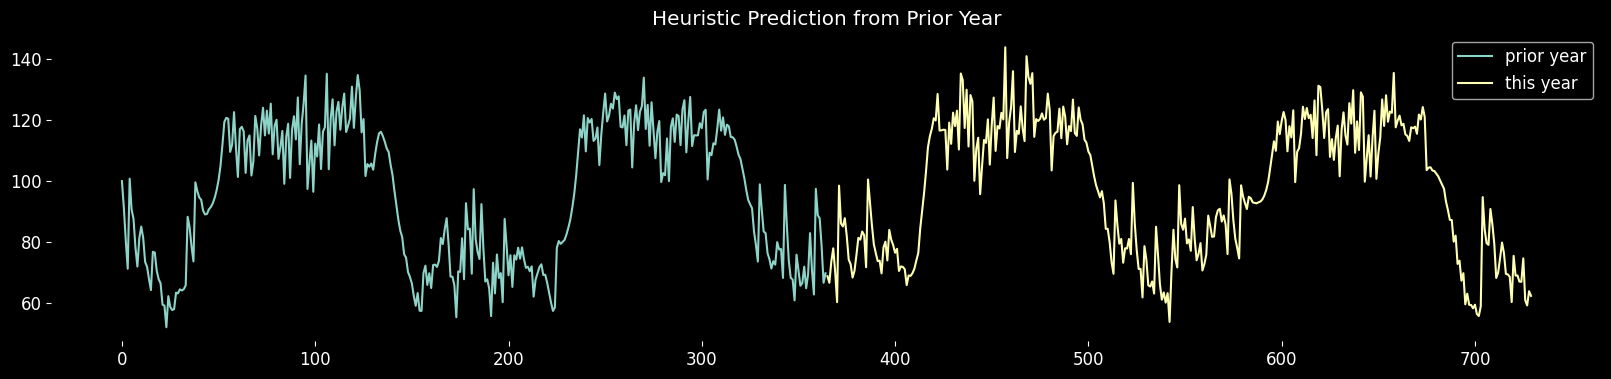

In [33]:
%matplotlib inline
plt.figure()
plt.plot( year_1.iloc[:,3], label = 'prior year')
plt.plot( year_2.iloc[:,3], label = 'this year')
plt.title('Heuristic Prediction from Prior Year')
plt.legend()
plt.show()

Let's calculate the error using the metric Weighted Absolute Percent Error (WAPE) which is calculated as:

$\text{WAPE} = \frac{\sum_i \sum_j |Y_{ij}-\hat{Y}_{ij}|} {\sum_i \sum_j |Y_{ij}|} $

Where:
- $Y_{ij}$ is the actual observation for time series j at time i 
- $\hat{Y}_{ij}$ is the predicted value for time series j at time i 

In [17]:
Y = actual[:,:]
Y_h = predictions.T[:,:]
wape = np.sum(np.abs(Y-Y_h))/np.sum(np.abs(Y))
print ('Forecasting accuracy (WAPE):',wape)

Forecasting accuracy (WAPE): 0.07444920931874238
